# Project 4

## Introduction:
Mushrooms are generally used as ingredients of food. However, we have to be careful because some kinds of mushrooms are poisonous. The point is that mushrooms have some characteristics that helps us figure out which mushrooms are edible or poisonous. The goal of this project is analyzing these characteristics to find out which characteristics are good indicators to know whether the mushroom is edible or not.

### Data Acquisition, Data Preparation & Exploratory Data Analysis

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [347]:
# Load data from provided website
mushroom=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header = None)
mushroom.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


__According to Attribute Info:__
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

I will took __'edible/poisonous','odor','spore-print-color','habitat'__ which are Column __0,5,20 and 22__

In [348]:
# A subset of the columns in the dataset.
# Including the column that indicates edible or poisonous, the column that includes odor,
# and spore-print-color and habitat
mushroom=pd.DataFrame(mushroom,
                  columns=[0,5,20,22])
mushroom

,0,5,20,22
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g
...,...,...,...,...
8119,e,n,b,l
8120,e,n,b,l
8121,e,n,b,l
8122,p,y,w,l


In [349]:
# Add meaningful names for each column in the DataFrame
mushroom.columns = ['EorP', 'Odor', 'SPcolor', 'Habitat']
mushroom

,EorP,Odor,SPcolor,Habitat
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g
...,...,...,...,...
8119,e,n,b,l
8120,e,n,b,l
8121,e,n,b,l
8122,p,y,w,l


In [350]:
# Change names of value to be more meaningful with provided information
# EorP Column
mushroom.EorP.replace({'e':'edible',
                       'p':'poisonous'}, 
                      inplace = True)
# Odor Column
mushroom.Odor.replace({'a':'almond', 
                   'l':'anise',
                   'c':'creosote',
                   'y':'fishy',
                   'f':'foul',
                   'm':'musty',
                   'n':'none',
                   'p':'pungent',
                   's':'spicy'},
                   inplace=True)
# S/P-Color Column
mushroom.SPcolor.replace({'k':'black',
                       'n':'brown',
                       'b':'buff',
                       'h':'chocolate',
                       'r':'green',
                       'o':'orange',
                       'u':'purple',
                       'w':'white',
                       'y':'yellow'}, 
                       inplace=True)
# Habitat Column
mushroom.Habitat.replace({'g':'grasses',
                       'l':'leaves',
                       'm':'meadows',
                       'p':'paths',
                       'u':'urban',
                       'w':'waste',
                       'd':'woods'
                      },
                      inplace=True)

In [351]:
mushroom

,EorP,Odor,SPcolor,Habitat
0,poisonous,pungent,black,urban
1,edible,almond,brown,grasses
2,edible,anise,brown,meadows
3,poisonous,pungent,black,urban
4,edible,none,brown,grasses
...,...,...,...,...
8119,edible,none,buff,leaves
8120,edible,none,buff,leaves
8121,edible,none,buff,leaves
8122,poisonous,fishy,white,leaves


### __Perform exploratory data analysis__: 
show the __distribution of data__ for each of the columns you selected, and show plots for __edible/poisonous vs. odor as well as the other columns that you selected__. It is up to you to decide which types of plots to use for these tasks. Include text describing your EDA findings.

### Show the distribution of data

In [352]:
# Summarize EorP Data
EorP=mushroom.groupby(['EorP']).size().to_frame('Count')
EorP

,Count
EorP,
edible,4208
poisonous,3916


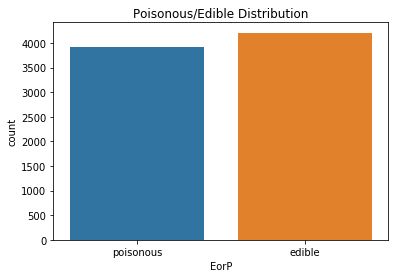

In [353]:
# Show distribution of EorP data 
plt.title('Poisonous/Edible Distribution');
sns.countplot(x='EorP',data=mushroom);

In [354]:
# Summarize Odor Data
Odor=mushroom.groupby(['Odor']).size().to_frame('Count')
Odor.sort_values(by='Count',ascending=False,inplace=True)
Odor

,Count
Odor,
none,3528
foul,2160
fishy,576
spicy,576
almond,400
anise,400
pungent,256
creosote,192
musty,36


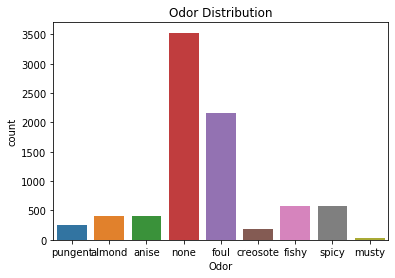

In [355]:
# Show distribution of Odor data 
plt.title('Odor Distribution');
sns.countplot(x='Odor',data=mushroom)

In [356]:
# Summarize SPcolor Data
SPcolor=mushroom.groupby(['SPcolor']).size().to_frame('Count')
SPcolor.sort_values(by='Count',ascending=False,inplace=True)
SPcolor

,Count
SPcolor,
white,2388
brown,1968
black,1872
chocolate,1632
green,72
buff,48
orange,48
purple,48
yellow,48


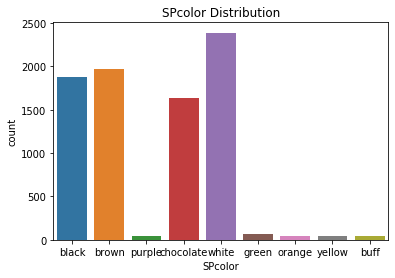

In [357]:
# Show distribution of SPcolor data 
plt.title('SPcolor Distribution')
sns.countplot(x='SPcolor',data=mushroom)

In [358]:
# Summarize Habitat Data
Habitat=mushroom.groupby(['Habitat']).size().to_frame('Count')
Habitat.sort_values(by='Count',ascending=False,inplace=True)
Habitat

,Count
Habitat,
woods,3148
grasses,2148
paths,1144
leaves,832
urban,368
meadows,292
waste,192


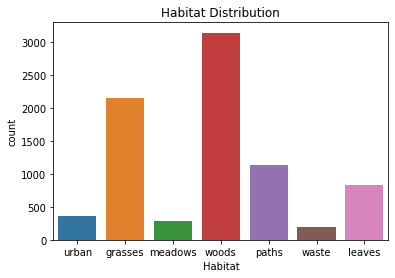

In [359]:
# Show distribution of Habitat data 
plt.title('Habitat Distribution')
sns.countplot(x='Habitat', data=mushroom)

### Show plots for edible/poisonous vs other indicators

In [360]:
# create a dataframe to calculate count of mushrooms by EorP and Odor
EorP_Odor=mushroom.groupby(['EorP','Odor'],as_index=False)['SPcolor'].count()
EorP_Odor.rename(columns={'SPcolor':'Count'},inplace=True)
EorP_Odor

,EorP,Odor,Count
0,edible,almond,400
1,edible,anise,400
2,edible,none,3408
3,poisonous,creosote,192
4,poisonous,fishy,576
5,poisonous,foul,2160
6,poisonous,musty,36
7,poisonous,none,120
8,poisonous,pungent,256
9,poisonous,spicy,576


In [361]:
# creates dataframe to merge total count of mushrooms by EorP or not and Odor by edible or not
EP_Odor = pd.merge(EorP_Odor,Odor,on=['Odor'],how='outer',suffixes=('_EP_Odor','_Total'))
EP_Odor

,EorP,Odor,Count_EP_Odor,Count_Total
0,edible,almond,400,400
1,edible,anise,400,400
2,edible,none,3408,3528
3,poisonous,none,120,3528
4,poisonous,creosote,192,192
5,poisonous,fishy,576,576
6,poisonous,foul,2160,2160
7,poisonous,musty,36,36
8,poisonous,pungent,256,256
9,poisonous,spicy,576,576


In [362]:
#creates column Percent to calculate percentage of mushrooms by EorP and by Odor
EP_Odor['Percent'] = (EP_Odor['Count_EP_Odor']/EP_Odor['Count_Total']) * 100
EP_Odor

,EorP,Odor,Count_EP_Odor,Count_Total,Percent
0,edible,almond,400,400,100.000000
1,edible,anise,400,400,100.000000
2,edible,none,3408,3528,96.598639
3,poisonous,none,120,3528,3.401361
4,poisonous,creosote,192,192,100.000000
5,poisonous,fishy,576,576,100.000000
6,poisonous,foul,2160,2160,100.000000
7,poisonous,musty,36,36,100.000000
8,poisonous,pungent,256,256,100.000000
9,poisonous,spicy,576,576,100.000000


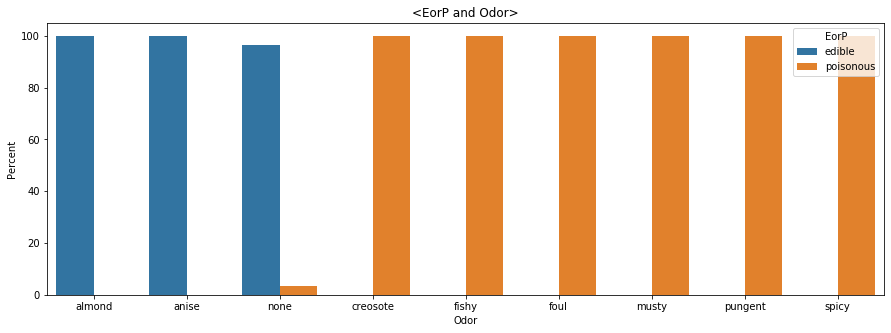

In [363]:
plt.figure(figsize=(15,5))
#plots mushroom dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='Odor',y='Percent',hue='EorP',data=EP_Odor);
# give the plot a title
plt.title('<EorP and Odor>');

__Findings__: Based on the chart above, it seems that mushroom's Odor is really good indicator to figure outwhether the mushroom is edible or poisionous. 
This is because odor 'almond' and 'anise' show that these odor means 100% edible mushroom. 
Odor 'none' shows that there is a few percentage of poisionous mushroom while odor 'creosote', ','fishy','foul','musty','pungent' and 'spicy' means 100% poisionous mushroom. 

In [364]:
#create a dataframe to calculate count of mushrooms by EorP and SPcolor
EP_SPcolor = mushroom.groupby(['EorP','SPcolor'],as_index=False)['Odor'].count()
EP_SPcolor.rename(columns={'Odor':'Count'},inplace=True)
EP_SPcolor

,EorP,SPcolor,Count
0,edible,black,1648
1,edible,brown,1744
2,edible,buff,48
3,edible,chocolate,48
4,edible,orange,48
5,edible,purple,48
6,edible,white,576
7,edible,yellow,48
8,poisonous,black,224
9,poisonous,brown,224


In [365]:
# creates dataframe to merge total count of mushrooms by EorP or not and SPcolor by edible or not
EP_SPcolor = pd.merge(EP_SPcolor,SPcolor,on=['SPcolor'],how='outer',suffixes=('_EP_SPcolor','_Total'))
EP_SPcolor

,EorP,SPcolor,Count_EP_SPcolor,Count_Total
0,edible,black,1648,1872
1,poisonous,black,224,1872
2,edible,brown,1744,1968
3,poisonous,brown,224,1968
4,edible,buff,48,48
5,edible,chocolate,48,1632
6,poisonous,chocolate,1584,1632
7,edible,orange,48,48
8,edible,purple,48,48
9,edible,white,576,2388


In [366]:
#creates column Percent to calculate percentage of mushrooms by EorP and by SPcolor
EP_SPcolor['Percent'] = (EP_SPcolor['Count_EP_SPcolor']/EP_SPcolor['Count_Total']) * 100
EP_SPcolor

,EorP,SPcolor,Count_EP_SPcolor,Count_Total,Percent
0,edible,black,1648,1872,88.034188
1,poisonous,black,224,1872,11.965812
2,edible,brown,1744,1968,88.617886
3,poisonous,brown,224,1968,11.382114
4,edible,buff,48,48,100.000000
5,edible,chocolate,48,1632,2.941176
6,poisonous,chocolate,1584,1632,97.058824
7,edible,orange,48,48,100.000000
8,edible,purple,48,48,100.000000
9,edible,white,576,2388,24.120603


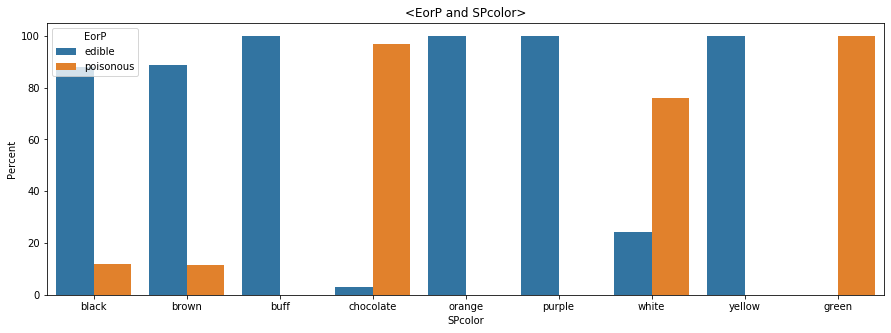

In [367]:
plt.figure(figsize=(15,5))
#plots mushroom dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='SPcolor',y='Percent',hue='EorP',data=EP_SPcolor);
# give the plot a title
plt.title('<EorP and SPcolor>');

__Findings__: Based on the chart above, it seems that mushroom's spore-print-color is also quite a good indicator to figure outwhether the mushroom is edible or poisonous. 
When spore-print-color is 'buff', 'orange', 'purple' and 'yellow', that means 100% edible mushroom while 'green' color means 100% poisonous mushroom. 
'Black' and 'Brown' colors means high probability of edible mushrooms, so this information can be used as references to figure out edible mushroom.

In [368]:
# create a dataframe to calculate count of mushrooms by EorP and Habitat
EP_Habitat = mushroom.groupby(['EorP','Habitat'],as_index=False)['SPcolor'].count()
EP_Habitat.rename(columns={'SPcolor':'Count'},inplace=True)
EP_Habitat

,EorP,Habitat,Count
0,edible,grasses,1408
1,edible,leaves,240
2,edible,meadows,256
3,edible,paths,136
4,edible,urban,96
5,edible,waste,192
6,edible,woods,1880
7,poisonous,grasses,740
8,poisonous,leaves,592
9,poisonous,meadows,36


In [369]:
# creates dataframe to merge total count of mushrooms by EorP or not and Odor by edible or not
EP_Habitat = pd.merge(EP_Habitat,Habitat,on=['Habitat'],how='outer',suffixes=('_EP_Habitat','_Total'))
EP_Habitat

,EorP,Habitat,Count_EP_Habitat,Count_Total
0,edible,grasses,1408,2148
1,poisonous,grasses,740,2148
2,edible,leaves,240,832
3,poisonous,leaves,592,832
4,edible,meadows,256,292
5,poisonous,meadows,36,292
6,edible,paths,136,1144
7,poisonous,paths,1008,1144
8,edible,urban,96,368
9,poisonous,urban,272,368


In [370]:
#creates column Percent to calculate percentage of mushrooms by EorP and by Odor
EP_Habitat['Percent'] = (EP_Habitat['Count_EP_Habitat']/EP_Habitat['Count_Total']) * 100
EP_Habitat

,EorP,Habitat,Count_EP_Habitat,Count_Total,Percent
0,edible,grasses,1408,2148,65.549348
1,poisonous,grasses,740,2148,34.450652
2,edible,leaves,240,832,28.846154
3,poisonous,leaves,592,832,71.153846
4,edible,meadows,256,292,87.671233
5,poisonous,meadows,36,292,12.328767
6,edible,paths,136,1144,11.888112
7,poisonous,paths,1008,1144,88.111888
8,edible,urban,96,368,26.086957
9,poisonous,urban,272,368,73.913043


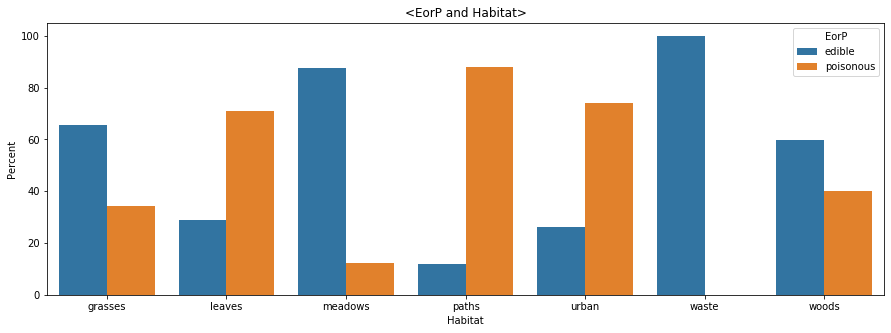

In [371]:
plt.figure(figsize=(15,5))
#plots mushroom dataset by Odor and whether it is edible or not using the percentages
sns.barplot(x='Habitat',y='Percent',hue='EorP',data=EP_Habitat);
# give the plot a title
plt.title('<EorP and Habitat>');

__Findings__: Based on the chart above, it seems that mushroom's habitat is not a good indicator to figure outwhether the mushroom is edible or poisonous in comparsion with previous two indicators. Only one factor 'waste' means 100% of poisonous mushrooms. Other factors such as 'grasses','leaves','urban' or 'woods' have similar percentage of edible and poisonous mushrooms. 

### Phase II: Build Predictive Models

__Convert the “e”/”p” indicators in the first column to digits__: for example, the “e” might become 0 and “p” might
become 1. __For each of the other columns in DataFrame create a set of dummy variables.__ For each of the other columns in DataFrame create a set of dummy variables. 

Include some text describing your preliminary conclusions about whether any of the other columns you’ve included in your subset (i.e., aside from the poisonous/edible indicator) could be helpful in predicting if a specific mushroom is edible or poisonous.

In [372]:
# copy the original one
mushroom2=mushroom.copy()
mushroom2

,EorP,Odor,SPcolor,Habitat
0,poisonous,pungent,black,urban
1,edible,almond,brown,grasses
2,edible,anise,brown,meadows
3,poisonous,pungent,black,urban
4,edible,none,brown,grasses
...,...,...,...,...
8119,edible,none,buff,leaves
8120,edible,none,buff,leaves
8121,edible,none,buff,leaves
8122,poisonous,fishy,white,leaves


In [373]:
# Convert the “e”/”p” indicators in the first column to digits: 
# replace e with 0, p with 1
mushroom2.EorP.replace('edible', 0, inplace = True)
mushroom2.EorP.replace('poisonous', 1, inplace = True)
mushroom2

,EorP,Odor,SPcolor,Habitat
0,1,pungent,black,urban
1,0,almond,brown,grasses
2,0,anise,brown,meadows
3,1,pungent,black,urban
4,0,none,brown,grasses
...,...,...,...,...
8119,0,none,buff,leaves
8120,0,none,buff,leaves
8121,0,none,buff,leaves
8122,1,fishy,white,leaves


#### For each of the other columns in DataFrame create a set of dummy variables.

In [374]:
mushroom_dummies=pd.get_dummies(mushroom2)
mushroom_dummies

,EorP,Odor_almond,Odor_anise,Odor_creosote,Odor_fishy,Odor_foul,Odor_musty,Odor_none,Odor_pungent,Odor_spicy,...,SPcolor_purple,SPcolor_white,SPcolor_yellow,Habitat_grasses,Habitat_leaves,Habitat_meadows,Habitat_paths,Habitat_urban,Habitat_waste,Habitat_woods
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


### Logistic Regression Modelling:

In [375]:
#Check to see if any null value existed
mushroom_dummies.isna().sum()

EorP                 0
Odor_almond          0
Odor_anise           0
Odor_creosote        0
Odor_fishy           0
Odor_foul            0
Odor_musty           0
Odor_none            0
Odor_pungent         0
Odor_spicy           0
SPcolor_black        0
SPcolor_brown        0
SPcolor_buff         0
SPcolor_chocolate    0
SPcolor_green        0
SPcolor_orange       0
SPcolor_purple       0
SPcolor_white        0
SPcolor_yellow       0
Habitat_grasses      0
Habitat_leaves       0
Habitat_meadows      0
Habitat_paths        0
Habitat_urban        0
Habitat_waste        0
Habitat_woods        0
dtype: int64

In [376]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### First Model: Odor

In [379]:
# first choose the odor to do the predict with the edible
# create dataframes with an intercept column
y_odor, X_odor = dmatrices('EorP ~ Odor_almond +  Odor_anise + Odor_creosote +  Odor_fishy +  \
Odor_foul + Odor_musty + Odor_none +  Odor_pungent +  Odor_spicy',mushroom_dummies, return_type="dataframe")
print (X_odor.columns)

# flatten y into a 1-D array
y_odor = np.ravel(y_odor)

Index(['Intercept', 'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy',
       'Odor_foul', 'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


In [382]:
# instantiate a logistic regression model, and fit with X and y
First_odor = LogisticRegression()
First_odor = First_odor.fit(X_odor, y_odor)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [383]:
# check the accuracy
First_odor.score(X_odor, y_odor)

0.9852289512555391

__Findings__: The result shows us that just using the odor column as predictor variable can actually yield a good model that is __98.52%__ accurate.

### Second Model: Odor and spore-print-color

In this model, I wanted to Odor and test spore-print-color in the logistic regression model. Spore-print-color was also quite a good model (less than Odor but better than Habitat).

In [393]:
# create dataframes with an intercept column
y_osp, X_osp = dmatrices('EorP ~ SPcolor_white + SPcolor_brown + SPcolor_black + SPcolor_chocolate \
                          + SPcolor_green + SPcolor_buff + SPcolor_orange + SPcolor_purple + SPcolor_yellow \
                          + Odor_almond +  Odor_anise +  Odor_creosote +  Odor_fishy +  Odor_foul \
                          + Odor_musty +  Odor_none +  Odor_pungent +  Odor_spicy',mushroom_dummies, return_type="dataframe")
y_osp = np.ravel(y_osp)
print (X_osp.columns)

Index(['Intercept', 'SPcolor_white', 'SPcolor_brown', 'SPcolor_black',
       'SPcolor_chocolate', 'SPcolor_green', 'SPcolor_buff', 'SPcolor_orange',
       'SPcolor_purple', 'SPcolor_yellow', 'Odor_almond', 'Odor_anise',
       'Odor_creosote', 'Odor_fishy', 'Odor_foul', 'Odor_musty', 'Odor_none',
       'Odor_pungent', 'Odor_spicy'],
      dtype='object')


In [394]:
Sec_odor_SP = LogisticRegression()
Sec_odor_SP = Sec_odor_SP.fit(X_osp, y_osp)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [395]:
# check the accuracy
Sec_odor_SP.score(X_osp, y_osp)

0.9940915805022157

__Findings__: The result above shows that adding odor and spore-print-color have more accurate (from __98.52% to 99.4%__).

### Third Model: Odor and habitat

In [396]:
# create dataframes with an intercept column
y_oha, X_oha = dmatrices('EorP ~ Habitat_woods + Habitat_grasses + Habitat_paths + Habitat_leaves \
                          + Habitat_urban + Habitat_meadows + Habitat_waste + Odor_almond + Odor_anise + \
                          Odor_creosote +  Odor_fishy +  Odor_foul + Odor_musty +  Odor_none + \
                          Odor_pungent +  Odor_spicy',mushroom_dummies, return_type="dataframe")
y_oha = np.ravel(y_oha)
print (X_oha.columns)

Index(['Intercept', 'Habitat_woods', 'Habitat_grasses', 'Habitat_paths',
       'Habitat_leaves', 'Habitat_urban', 'Habitat_meadows', 'Habitat_waste',
       'Odor_almond', 'Odor_anise', 'Odor_creosote', 'Odor_fishy', 'Odor_foul',
       'Odor_musty', 'Odor_none', 'Odor_pungent', 'Odor_spicy'],
      dtype='object')


In [397]:
Trd_odor_HB = LogisticRegression()
Trd_odor_HB = Trd_odor_HB.fit(X_oha, y_oha)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [398]:
# check the accuracy
Trd_odor_HB.score(X_oha, y_oha)

0.9896602658788775

__Findings__: The result above shows that adding odor and spore-print-color have more accurate (from __98.52% to 98.96%__).

In [407]:
# examine the coefficients
pd.DataFrame(list(zip(X_osp.columns, np.transpose(Sec_odor_SP.coef_))))

,0,1
0,Intercept,[1.078679399814569]
1,SPcolor_white,[1.5206360826184222]
2,SPcolor_brown,[-2.315859579114597]
3,SPcolor_black,[-2.2654895114593887]
4,SPcolor_chocolate,[0.8033120468859873]
5,SPcolor_green,[6.2771999266568725]
6,SPcolor_buff,[-0.5516839886368434]
7,SPcolor_orange,[-0.5516839886368434]
8,SPcolor_purple,[-1.2860675998626312]
9,SPcolor_yellow,[-0.5516839886368434]


__Findings__: Based on the results of the coefficients above, the SP colors: brown, black, buff, orange, purple, yellow decreases the chance of the mushroom becoming edible. 

In [411]:
# evaluate the model by splitting into train and test sets
X_osp_train, X_osp_test, y_osp_train, y_osp_test = train_test_split(X_osp, y_osp, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_osp_train, y_osp_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [412]:
# predict class labels for the test set
predicted = model2.predict(X_osp_test)
print (predicted)

[1. 0. 0. ... 1. 1. 1.]


In [413]:
# generate class probabilities
probs = model2.predict_proba(X_osp_test)
print (probs)

[[0.02025778 0.97974222]
 [0.99725525 0.00274475]
 [0.98581276 0.01418724]
 ...
 [0.00136041 0.99863959]
 [0.0046842  0.9953158 ]
 [0.00474534 0.99525466]]


In [414]:
# generate evaluation metrics
print (metrics.accuracy_score(y_osp_test, predicted))
print (metrics.roc_auc_score(y_osp_test, probs[:, 1]))

0.9950779327317474
0.9993608207385353


Result: The accuracy is 99%

### Question: Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?

__Conclusion__:
Based on the EDA and logistic regression results, I concluded that __combining odor and SP Color is the best predictor__ to figure out whether a mushroom is edible or not. 
Odor alone can create a logistic regression model that is 98.52% accurate, and __odor+SP Color has 99.4% of accuarcy__. 

However, I also recommend that using other physical attributes of the mushroom to find out which combinations will yield almost the same accuracy.